In [24]:
import numpy as np
import pandas as pd
import glob 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from myvtk.GetMakeVtk import *

files = glob.glob("./k1k2/*.csv")
print (files)
dfs = []
for f in files:
    df = pd.read_csv(f, index_col=False)
    df.columns = ['idx','x_k1','x_k2','y_k1','y_k2','z_k1', 'z_k2']
    dfs.append(df)
    # print (df.)
df.head()

['./k1k2\\BG0002_Left.csv', './k1k2\\BG0002_Right.csv', './k1k2\\BG0014_Left.csv', './k1k2\\BG0014_Right.csv', './k1k2\\BG0019_Left.csv', './k1k2\\BG0019_Right.csv', './k1k2\\BG0020_Left.csv', './k1k2\\BG0020_Right.csv', './k1k2\\BG0021_Left.csv', './k1k2\\BG0021_Right.csv', './k1k2\\BG0022_Left.csv', './k1k2\\BG0022_Right.csv', './k1k2\\BG04_Left.csv', './k1k2\\BG04_Right.csv', './k1k2\\BG09_Left.csv', './k1k2\\BG09_Right.csv', './k1k2\\BG10_Left.csv', './k1k2\\BG10_Right.csv', './k1k2\\BG11_Left.csv', './k1k2\\BG11_Right.csv', './k1k2\\BG12_Left.csv', './k1k2\\BG12_Right.csv', './k1k2\\BG13_Left.csv', './k1k2\\BG13_Right.csv', './k1k2\\BG15_Left.csv', './k1k2\\BG15_Right.csv', './k1k2\\BG17_Left.csv', './k1k2\\BG17_Right.csv', './k1k2\\BG18_Left.csv', './k1k2\\BG18_Right.csv', './k1k2\\BH0002_Left.csv', './k1k2\\BH0002_Right.csv', './k1k2\\BH0003_Left.csv', './k1k2\\BH0003_Right.csv', './k1k2\\BH0004_Left.csv', './k1k2\\BH0004_Right.csv', './k1k2\\BH0005_Left.csv', './k1k2\\BH0005_Ri

,idx,x_k1,x_k2,y_k1,y_k2,z_k1,z_k2
0,0,-0.076189,-0.000005,-0.076245,0.000420,-0.075846,-0.000087
1,1,-0.051949,-0.049978,-0.051724,-0.051238,-0.048950,-0.044275
2,2,-0.015283,-0.092120,-0.015020,-0.092481,-0.014836,-0.092781
3,3,0.008700,-0.094275,0.006648,-0.093521,0.006450,-0.093250
4,4,0.036385,-0.101678,0.028599,-0.101041,0.030816,-0.100995


In [25]:


f = glob.glob("./scaling/resamp_attr_ascii/*.vtk")

r = []
pts = []
PTN = []
curvs = []
torss = []
abscs = [] 
for i in range(len(files)): 
    f = "./scaling/resamp_attr_ascii/"+ files[i].split("\\")[-1][:-4]+".vtk"
    pt, Curv, Tors, Radius, Abscissas, ptns = GetMyVtk(f)
    centroid = np.array([np.mean(pt[:,0]),np.mean(pt[:,1]),np.mean(pt[:,2])])
    pt = pt-centroid
    pts.append(pt)
    r.append(Radius)
    PTN.append(ptns)
    curvs.append(Curv)
    torss.append(Tors)
    abscs.append(Abscissas)
pts = np.array(pts)
r = np.array(r)
PTN = np.array(PTN)
curvs=np.array(curvs)
torss = np.array(torss)
abscs= np.array(abscs)

print (pts.shape)

(104, 64, 3)


In [26]:
idx = 66

for idx in range(len(files)):
    annotation_font_size = 6
    scatter_size = 8
    linewidth = 1
    labelpad = 2
    color1="mistyrose"
    df = dfs[idx]
    fig = plt.figure(dpi=150)
    gs1 = fig.add_gridspec(nrows=23, ncols=25)
    ax1 = fig.add_subplot(gs1[0:12, 0:7])
    ax1.plot(df.x_k1, df.x_k2,c="dimgray", linewidth=linewidth)
    ax1.scatter(df.x_k1[0], df.x_k2[0],c="red",s =scatter_size)
    ax1.scatter(df.x_k1[1:], df.x_k2[1:],c=color1,s =scatter_size)
    for i in range(1, len(df)):
        ax1.text(df.x_k1[i], df.x_k2[i],i,c="dimgray", ha="left",va ="bottom",fontsize=annotation_font_size)

    ax3 = fig.add_subplot(gs1[0:12, 9:16])
    ax3.plot(df.y_k1, df.y_k2,c="dimgray", linewidth=linewidth)
    ax3.scatter(df.y_k1[0], df.y_k2[0],c="red",s =scatter_size)
    ax3.scatter(df.y_k1[1:], df.y_k2[1:],c=color1,s =scatter_size)
    for i in range(1, len(df)):
        ax3.text(df.y_k1[i], df.y_k2[i],i,c="dimgray", ha="left",va ="bottom",fontsize=annotation_font_size)

    ax4 = fig.add_subplot(gs1[0:12, 18:25])
    ax4.plot(df.z_k1, df.z_k2,c="dimgray", linewidth=linewidth)
    ax4.scatter(df.z_k1[0], df.z_k2[0],c="red",s =scatter_size)
    ax4.scatter(df.z_k1[1:], df.z_k2[1:],c=color1,s =scatter_size)
    for i in range(1, len(df)):
        ax4.text(df.z_k1[i], df.z_k2[i],i,c="dimgray", ha="left",va ="bottom",fontsize=annotation_font_size)

    ax2 = fig.add_subplot(gs1[16:, :])
    ax2.plot(range(len(curvs[idx])), curvs[idx], linewidth=linewidth, color="dimgray")



    for ax in [ax1, ax2, ax3, ax4]:
        ax.tick_params(axis='both', which='major', labelsize=5)
        ax.tick_params(axis='both', which='minor', labelsize=4) 
        ax.grid(linestyle=":")
        ax.set_facecolor("azure")
    fig.suptitle(files[idx].split("\\")[-1][:-4], fontsize=10)
    ax1.set_title("x", fontsize=8)
    ax3.set_title("y", fontsize=8)
    ax4.set_title("z", fontsize=8)
    ax2.set_title("Curvature", fontsize=8)

    for ax in [ax1, ax3, ax4]:
        ax.set_xlabel("k1", fontsize=8, labelpad=labelpad)
        ax.set_ylabel("k2", fontsize=8, labelpad=labelpad)

    ax2.set_xlabel("nodes", fontsize=8, labelpad=labelpad)
    ax2.set_ylabel("curvature", fontsize=8, labelpad=labelpad)


    for nd in find_peaks(curvs[idx], distance=3, width=2)[0]:
        ax1.scatter(df.x_k1[nd], df.x_k2[nd],c="white",s =scatter_size, edgecolor="red")
        ax3.scatter(df.y_k1[nd], df.y_k2[nd],c="white",s =scatter_size, edgecolor="red")
        ax4.scatter(df.z_k1[nd], df.z_k2[nd],c="white",s =scatter_size, edgecolor="red")

        ax2.scatter(nd, curvs[idx][nd],c="white",s =scatter_size, edgecolor="red")
        ax2.text(nd, curvs[idx][nd], nd,fontsize=annotation_font_size, ha="left",va ="center")



    plt.savefig("./k1k2/img/{}.png".format(files[idx].split("\\")[-1][:-4]))
    plt.close()

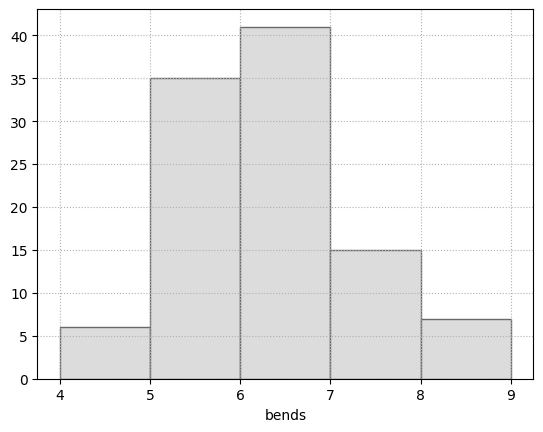

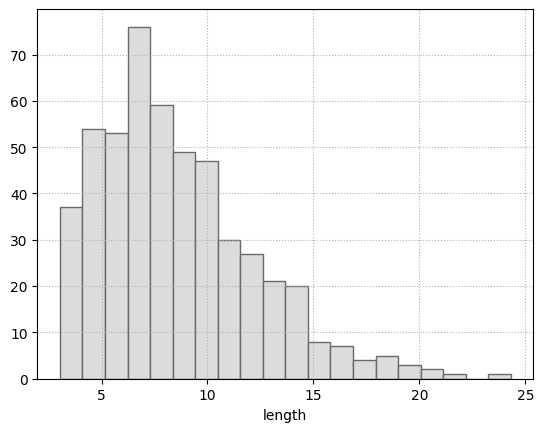

In [33]:
bends = []
bend_lengths = []
for idx in range(len(dfs)):
    df = dfs[idx]
    peaks = find_peaks(curvs[idx], distance=3, width=2)[0]
    bends.append(len(peaks))
    for j in range(1, len(peaks)):
        current_node_idx = peaks[j]
        previous_node_idx = peaks[j-1]
        bend_length = measure_length_f_n2n(pts[idx], previous_node_idx, current_node_idx)
        bend_lengths.append(bend_length)

plt.hist(bends, color="gainsboro",edgecolor="dimgray", bins=5)
plt.grid(linestyle=":")
plt.xlabel("bends")
plt.show()

plt.hist(bend_lengths, color="gainsboro",edgecolor="dimgray", bins=20)
plt.grid(linestyle=":")
plt.xlabel("length")
plt.show()